# Differential equations. Assignment. Numerical methods
Madina Gafarova, BS17-02

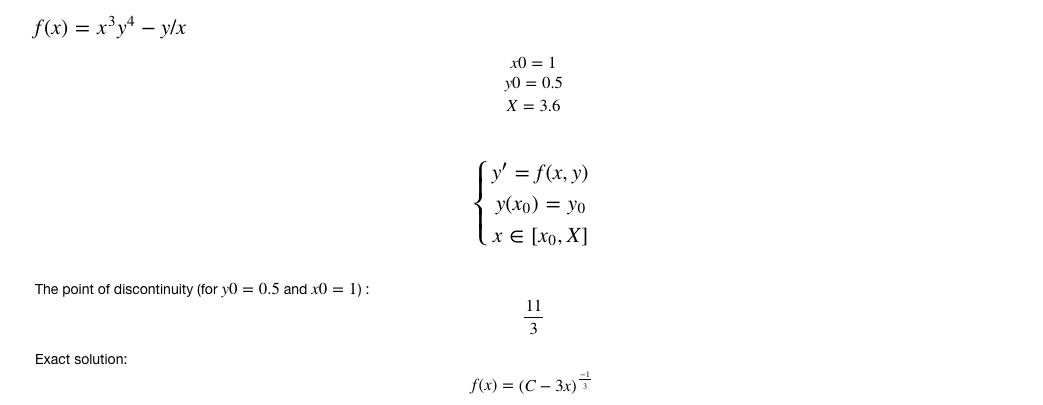

**Import libraries :** 

In [1]:
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

import plotly.plotly as ply
import plotly.graph_objs as go

import warnings
warnings.filterwarnings('ignore')

Initial function and initial points

In [2]:
f = lambda x, y: x**3 * y**4 - y/x
x0 = 1
y0 = 0.5
X = 3.6
h = 0.01

C = (y0*x0)**(-3) + 3*x0
##Exact function(solution)
f_exact =  lambda x: (C-3*x)**(-1/3)/x

# Euler method

In [3]:
def euler_method(f, x0, y0, X, h):
    x = x0
    y = y0
    
    num_steps = int((X - x)/h)
    
    array = [(x, y)]
    for i in range(num_steps):
        y = y + h*f(x, y)
        x = x + h
        array.append((x, y))
    return np.array(array)

In [4]:
array = euler_method(f, x0, y0, X, h)

### The plot of Euler method

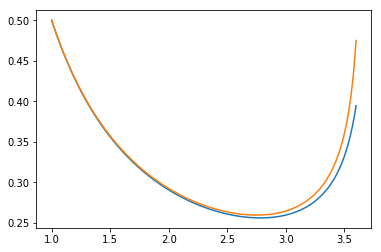

In [5]:
plt.plot(array[:,0], array[:,1])
plt.plot(array[:,0], f_exact(array[:,0]))

### The error of Euler method

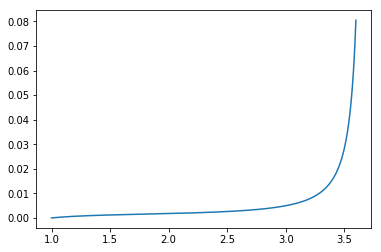

In [6]:
error = np.abs(f_exact(array[:,0])-array[:,1])
plt.plot(array[:,0], error)

**Printing Euler error**

In [7]:
print(error[:7])

[0.00000000e+00 4.48683877e-05 8.82158867e-05 1.30110658e-04
 1.70617374e-04 2.09797427e-04 2.47709126e-04]


# Improved Euler method

In [8]:
def improved_euler_method(f , x0, y0, X, h):
    x = x0
    y = y0
    
    num_steps = int((X - x)/h)
    array_im = [(x, y)]
    
    for i in range (num_steps):
        tmp = y
        y = y + h*f(x,y)
        y = tmp + h/2*(f(x, tmp) + f(x+h, y))
        x = x + h
        array_im.append((x, y))
    return np.array(array_im)

In [9]:
array_im = improved_euler_method(f, x0, y0, X, h)

## The plot of Improved Euler method

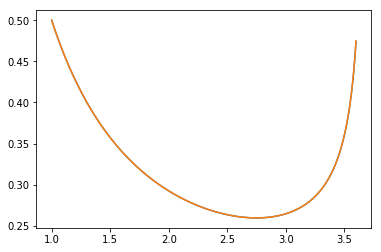

In [10]:
plt.plot(array_im[:,0], array_im[:,1])
plt.plot(array_im[:,0], f_exact(array_im[:,0]))

## The error of Improved Euler method

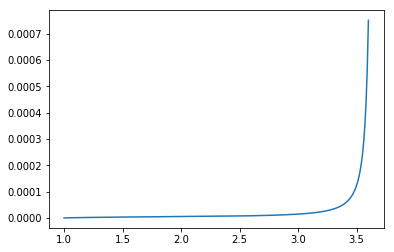

In [11]:
error_im = np.abs(f_exact(array_im[:,0])-array_im[:,1])
plt.plot(array_im[:,0], error_im)

**Printing Improved Euler error**

In [12]:
print(error_im[:7])

[0.00000000e+00 1.10307652e-07 2.17225256e-07 3.20899832e-07
 4.21471093e-07 5.19071874e-07 6.13828533e-07]


# Runge-Kutta method

In [13]:
def runge_kutta_method(f, x0, y0, X, h):
    x = x0
    y = y0
    
    num_steps = int((X - x)/h)
    array_rk = [(x, y)]
    
    for i in range(num_steps):
        k1 = h*f(x, y)
        k2 = h*f(x + h/2, y + k1/2)
        k3 = h*f(x + h/2, y + k2/2)
        k4 = h*f(x + h, y + k3)
        y = y + 1/6*(k1 + 2*k2 + 2*k3+ k4)
        x = x + h
        array_rk.append((x, y))
    return np.array(array_rk)

In [14]:
array_rk = runge_kutta_method(f, x0, y0, X, h)

## The plot of Runge-Kutta method

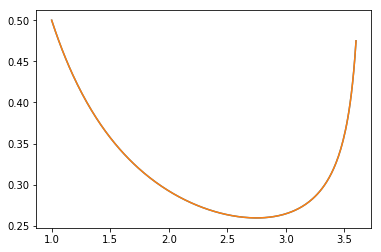

In [15]:
plt.plot(array_rk[:,0], array_rk[:,1])
plt.plot(array_rk[:,0], f_exact(array_rk[:,0]))

## The error of Runge-Kutta method

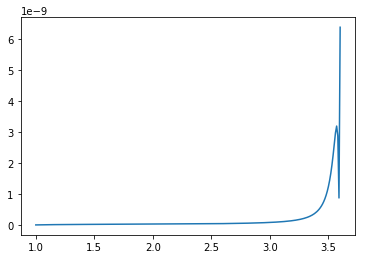

In [16]:
error_rk = np.abs(f_exact(array_rk[:,0])-array_rk[:,1])
plt.plot(array_rk[:,0], error_rk)

**Printing Runge-Kutta error**

In [17]:
print(error_rk[:7])

[0.00000000e+00 7.81763543e-13 1.52916568e-12 2.24392727e-12
 2.92804669e-12 3.58307828e-12 4.21074287e-12]


## Comparisons of numerical methods

In [18]:
trace1 = go.Scatter(
    name = "Exact solution",
    x = array[:,0],
    y = f_exact(array[:,0])
)
trace2 = go.Scatter(
    name = "Euler method",
    x = array[:,0],
    y = array[:,1]
)
trace3 = go.Scatter(
    name = "Euler improved method",
    x = array_im[:,0],
    y = array_im[:,1]
)
trace4 = go.Scatter(
    name = "Runge-Kutta method",
    x = array_rk[:,0],
    y = array_rk[:,1]
)
layout_ltr = go.Layout(title="Comparison of numerical methods")
data = [trace1, trace2, trace3, trace4]
fig = go.Figure(data= data, layout=layout_ltr)
ply.iplot(fig)

## Comparisons of numerical errors

In [19]:
trace_error1 = go.Scatter(
    name = "Euler method",
    x = array[:,0],
    y = error
)
trace_error2 = go.Scatter(
    name = "Euler improved error",
    x = array_im[:,0],
    y = error_im
)
trace_error3 = go.Scatter(
    name = "Runge-Kutta error",
    x = array_rk[:,0],
    y = error_rk
)
layout_ltr = go.Layout(title="Comparison of numerical errors")
data = [trace_error1, trace_error2, trace_error3]
fig = go.Figure(data= data, layout=layout_ltr)
ply.iplot(fig)

## Log10 errors

In [20]:
trace_log_error1 = go.Scatter(
    name = "Euler method",
    x = array[:,0],
    y = np.log10(error)
)
trace_log_error2 = go.Scatter(
    name = "Euler improved error",
    x = array_im[:,0],
    y = np.log10(error_im)
)
trace_log_error3 = go.Scatter(
    name = "Runge-Kutta error",
    x = array_rk[:,0],
    y = np.log10(error_rk)
)
layout_ltr = go.Layout(title="Comparison of numerical log10 errors", yaxis=dict(title="Log10 error"))
data = [trace_log_error1, trace_log_error2, trace_log_error3]
fig = go.Figure(data= data, layout=layout_ltr)
ply.iplot(fig)